<a href="https://colab.research.google.com/github/alfian-mamab/Coffee_Shop/blob/main/%E2%80%9CSQL_DataPrep_EDA%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section, Google collab will be linked to the data file

In [ ]:
#Connecting Google Collab with GDrive
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Connecting targeted folder with google collab
path = "/content/gdrive/MyDrive/NarasiO/Meet 21 - Capstone/"
os.listdir(path)

['CoffeeShop_Dataset.db',
 'Catatan.gdoc',
 'salesoutlet.xlsx',
 'product.xlsx',
 'pastryinventory.xlsx',
 'generations.xlsx',
 'salesreciepts.xlsx',
 'customer.xlsx',
 'customergeneration.xlsx',
 '“Case 1 - Alfian Afan”.ipynb']

In [ ]:
# Import packages
import sqlite3
import pandas as pd
import numpy as np
from numpy import random
from numpy import mean
from numpy.random import seed
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connecting file with google collab
conn = sqlite3.connect(path + 'CoffeeShop_Dataset.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


The steps will be divided into 3 major parts, including
1. Data preparation
2. Descriptive Statistical
3. Problem Discovery

In [ ]:
#PART 1. DATA PREPARATION

PART 1. DATA PREPARATION

In the data preparation section, there are several things that will be done, starting from taking data tables, then checking for missing values, duplications, and wrong data types, then if necessary, merging tables, changing column names, and changing data formats

In [ ]:
# 1.1 Sales Outlet Data

#Take data sales outlet table
salesoutlet_table = pd.read_sql_query('''SELECT *
                                      FROM 'sales outlet'
                                      ''', conn)
#Check missing value potential
print(salesoutlet_table.info())
print('there is missing value in manager but the data is string')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes
None
there is missing value in manager but the data is string


there is missing value in manager but the data must be in string form. since the manager id do not has significant value, it can be ignored.

In [ ]:
#Check for duplication of data
print(salesoutlet_table[salesoutlet_table.duplicated(keep=False)])
print('no duplication')

Empty DataFrame
Columns: [sales_outlet_id, sales_outlet_type, store_square_feet, store_address, store_city, store_state_province, store_telephone, store_postal_code, store_longitude, store_latitude, manager, Neighorhood]
Index: []
no duplication


In [ ]:
#Converts the manager column to a string
salesoutlet_table['manager'] = salesoutlet_table['manager'].astype(str)
salesoutlet_table.head(5)

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,nan,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [ ]:
#1.2 Pastry Inventory Data

#Retrieve pastry inventory data
pastryinventory_table = pd.read_sql_query('''SELECT *
                                      FROM 'pastry inventory'
                                      ''', conn)
#Checking Data Types and Seeing Potential Missing Values
print(pastryinventory_table.info())
print('the transaction_date column needs to be changed to date type and waste to integer type by removing the % symbol')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB
None
the transaction_date column needs to be changed to date type and waste to integer type by removing the % symbol


there is "%" symbol in waste data colomn, so it must be removed and the data type should be converted into integer type
morover, the transaction date still in object type

In [ ]:
#Change the transaction_date column to the date type
pastryinventory_table['transaction_date'] = pd.to_datetime(pastryinventory_table['transaction_date'])
#Changed the % Waste column to float type
pastryinventory_table['% waste'] = pastryinventory_table['% waste'].str.rstrip('%').astype('float') / 100.0
print(pastryinventory_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    int64         
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    int64         
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 16.9 KB
None


In [ ]:
#Checking for Potential Duplicate Data
print(pastryinventory_table[pastryinventory_table.duplicated(keep=False)])
print('No Duplication')

Empty DataFrame
Columns: [sales_outlet_id, transaction_date, product_id, start_of_day, quantity_sold, waste, % waste]
Index: []
No Duplication


In [ ]:
pastryinventory_table.head(5)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,2019-04-01,69,18,8,10,0.56
1,3,2019-04-01,70,18,12,6,0.33
2,3,2019-04-01,71,18,8,10,0.56
3,3,2019-04-01,72,48,9,39,0.81
4,3,2019-04-01,73,18,9,9,0.50


In [ ]:
#1.3 Product Data

#Mretrieve product data
product_table = pd.read_sql_query('''SELECT *
                                      FROM product
                                      ''', conn)
#Checking Data Types and Seeing Potential Missing Values
print(product_table.info())
print('there is no missing value but the current_retail_price column must be changed to float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB
None
there is no missing value but the current_retail_price column must be cha

similar to previous waste case, the current retail data consist currency symbol. in the following step, it will be removed and the data type will converted into flot type

In [ ]:
#Remove the currency symbol and change the type in the current retail price column data
product_table['current_retail_price_$'] = product_table['current_retail_price'].apply(lambda x: float(x[1:]))
product_table = product_table.drop(columns=['current_retail_price'])
product_table.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_$
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,Y,N,N,15.00


In [ ]:
#Checking for duplicate potential
print(product_table[product_table.duplicated(keep=False)])
print('no duplication')

Empty DataFrame
Columns: [product_id, product_group, product_category, product_type, product, product_description, unit_of_measure, current_wholesale_price, tax_exempt_yn, promo_yn, new_product_yn, current_retail_price_$]
Index: []
no duplication


In [ ]:
product_table.head(5)

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_$
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,Y,N,N,15.00


In [ ]:
#1.4 Sales Reciepts Data

#Retrieving Sales Reciepts Data
salesreciepts_table = pd.read_sql_query('''SELECT *
                                      FROM 'sales reciepts'
                                      ''', conn)
#Checking Data Types and Identify Potential Missing Values
print(salesreciepts_table.info())
print('no missing value')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB
None
no missing value


In [ ]:
#Checking data duplication
print(salesreciepts_table[salesreciepts_table.duplicated(keep=False)])
print('no duplication')

Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, sales_outlet_id, staff_id, customer_id, instore_yn, order, line_item_id, product_id, quantity, line_item_amount, unit_price, promo_item_yn]
Index: []
no duplication


In [ ]:
salesreciepts_table.head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [ ]:
#1.5 Customer Data

#Retrieving customer data
customer_table = pd.read_sql_query('''SELECT *
                                      FROM customer
                                      ''', conn)
#Checking Data Types and Identify Potential Missing Values
print(customer_table.info())
print('no missing value')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB
None
no missing value


In [ ]:
customer_table.head(5)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [ ]:
#1.6 Generation Data

#Retrieving customer data
generations_table = pd.read_sql_query('''SELECT *
                                      FROM generations
                                      ''', conn)
generations_table.head(5)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


generation data highly depend on customer data, specially birth_year, so it can be combined

In [ ]:
#Combine Customer data and Generation data
customergenerations_table = pd.read_sql_query('''
                  SELECT
                      customer.*,
                      generations.generation
                      FROM customer
                  LEFT JOIN generations ON customer.birth_year = generations.birth_year
                  ''', conn)
customergenerations_table['birthdate'] = pd.to_datetime(customergenerations_table['birthdate'])
#Checking Data Types and Seeing Potential Missing Values
print(customergenerations_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   int64         
 1   home_store           2246 non-null   int64         
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   object        
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   object        
 8   birth_year           2246 non-null   int64         
 9   generation           2246 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 175.6+ KB
None


In [ ]:
#Ensure there is no duplication of data
print(customergenerations_table[customergenerations_table.duplicated(keep=False)])
print('no duplication')

Empty DataFrame
Columns: [customer_id, home_store, customer_first-name, customer_email, customer_since, loyalty_card_number, birthdate, gender, birth_year, generation]
Index: []
no duplication


In [ ]:
customergenerations_table.head(5)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,Baby Boomers
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,Baby Boomers
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,Baby Boomers
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,Baby Boomers


In [ ]:
# 2 DESCRIPTIVE STATISTICS

data were analyzed through descriptive statistical methods and inferential statistics. the goal is to extract key information from the data and find out the general form of the data to be analyzed

customer age average is  40.61442564559216
Customer age median is  38.0
Age variancy of customers in each outlets


<Axes: xlabel='home_store', ylabel='age'>

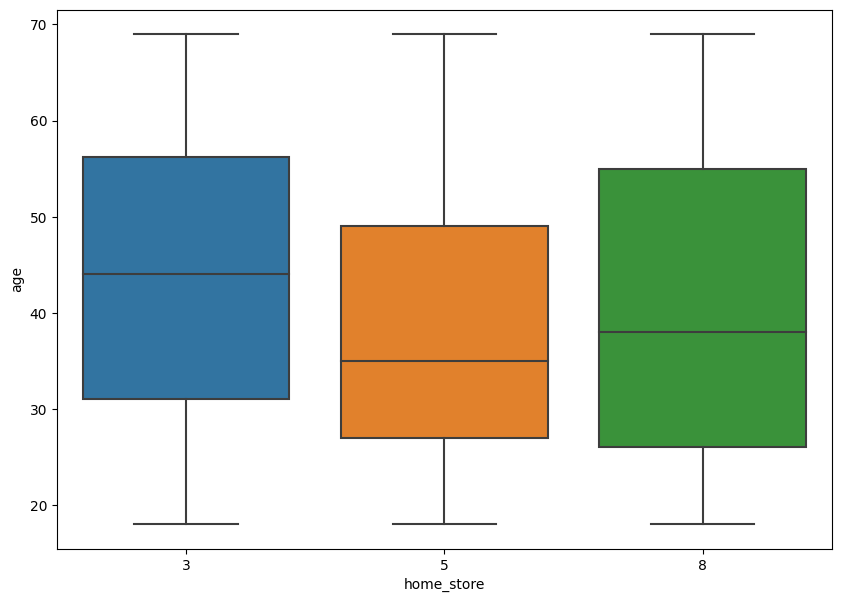

In [ ]:
# 2.1 Customer Age
customergenerations_table ['age'] = 2019 - customergenerations_table ['birth_year']
mean_age= customergenerations_table ['age'].mean()
median_age = customergenerations_table ['age'].median()
print ('customer age average is ', str(mean_age))
print ('Customer age median is ', str(median_age))

# Age year variancy of customers in each outlets
print ('Age variancy of customers in each outlets')
plt.figure(figsize=(10,7))
sns.boxplot(x = 'home_store', y = 'age', data = customergenerations_table)

2.1.2 transaction per day data
count      29.000000
mean     1720.482759
std       116.008504
min      1465.000000
25%      1665.000000
50%      1707.000000
75%      1815.000000
max      1907.000000
Name: transaction_id, dtype: float64


<Axes: xlabel='transaction_date', ylabel='transaction_id'>

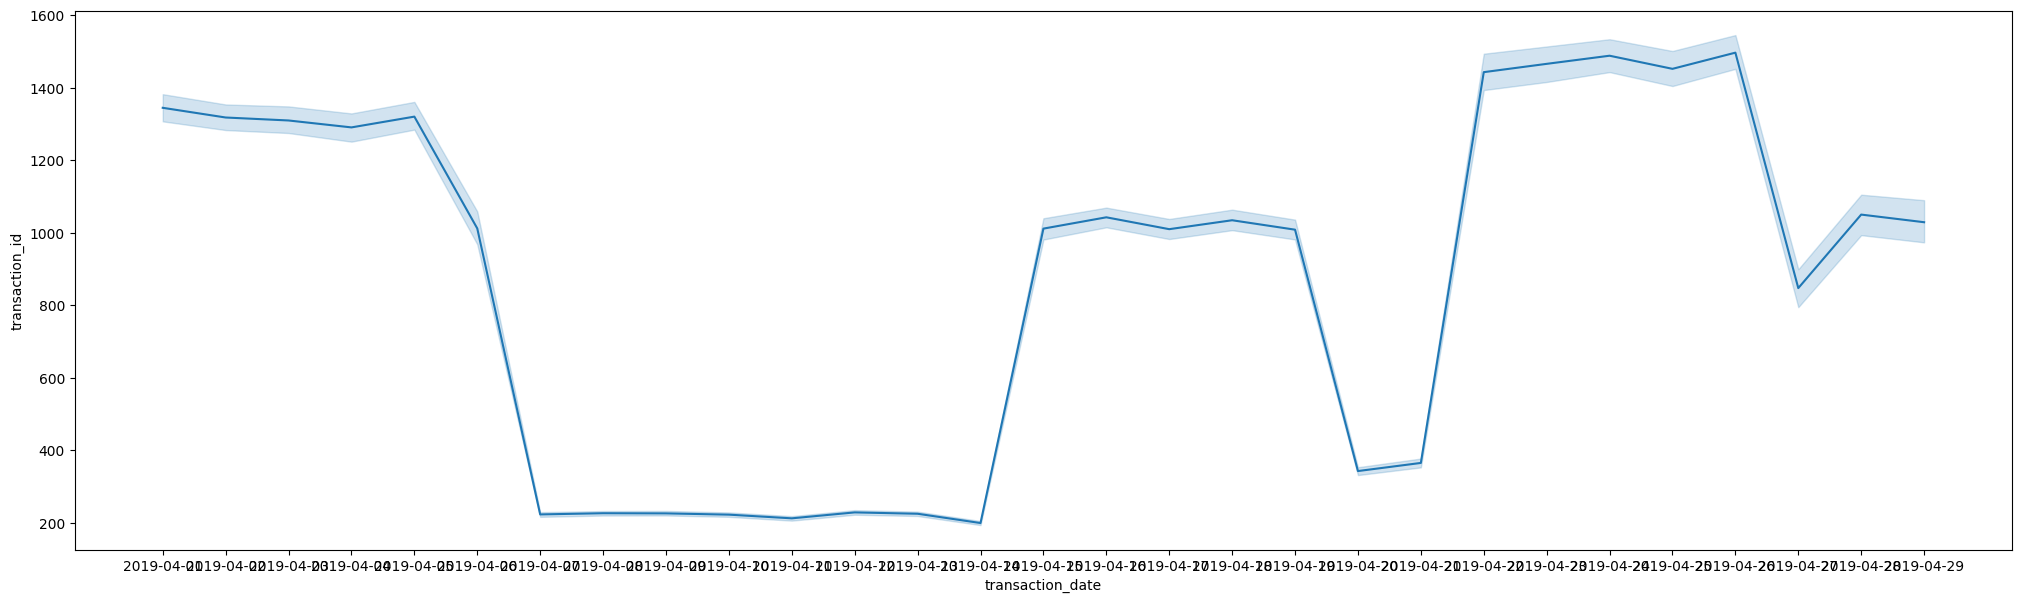

In [ ]:
#2.2 Transaction Per Day
trs_day = salesreciepts_table.groupby('transaction_date')['transaction_id'].count()
print ('2.1.2 transaction per day data')
print (trs_day.describe())
plt.figure(figsize=(25,7))
sns.lineplot(x="transaction_date", y="transaction_id", data=salesreciepts_table)

In [ ]:
# 2.3 %Waste
print ('%Waste Data')
print (pastryinventory_table['% waste'].describe())

%Waste Data
count    307.000000
mean       0.581075
std        0.208594
min        0.000000
25%        0.440000
50%        0.580000
75%        0.720000
max        0.960000
Name: % waste, dtype: float64


in the given period (april 2019), persentage of waste products was almost 60% high

stock vs sold


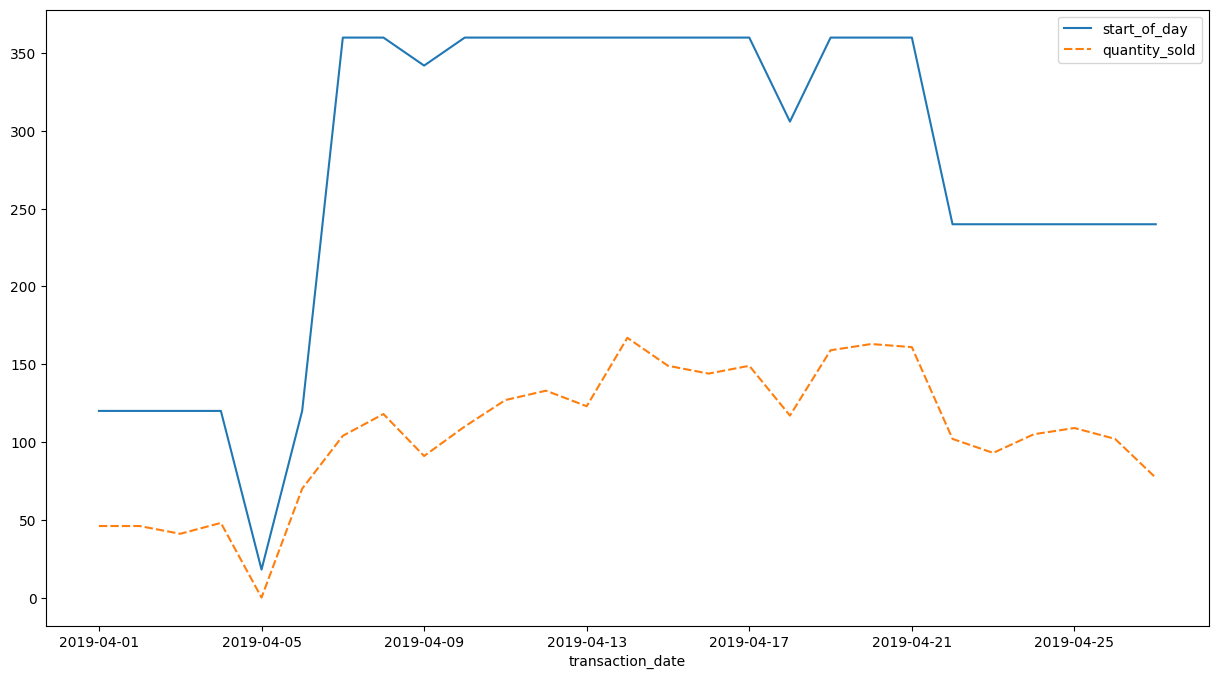

In [ ]:
# Daily stock vs quantity sold
data_group_inventory=pastryinventory_table.groupby('transaction_date')[['start_of_day', 'quantity_sold']].sum()
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=data_group_inventory)
print ('stock vs sold')
plt.show()

unsold product was always high except on april 15th

In [ ]:
# 3 PROBLEM DISCOVERY

In this section, testing will be carried out on a list of questions that are directed to the objectives of the research

In [ ]:
# 3.1 What is the relationship between consumer generation and product selection

<Axes: xlabel='generation'>

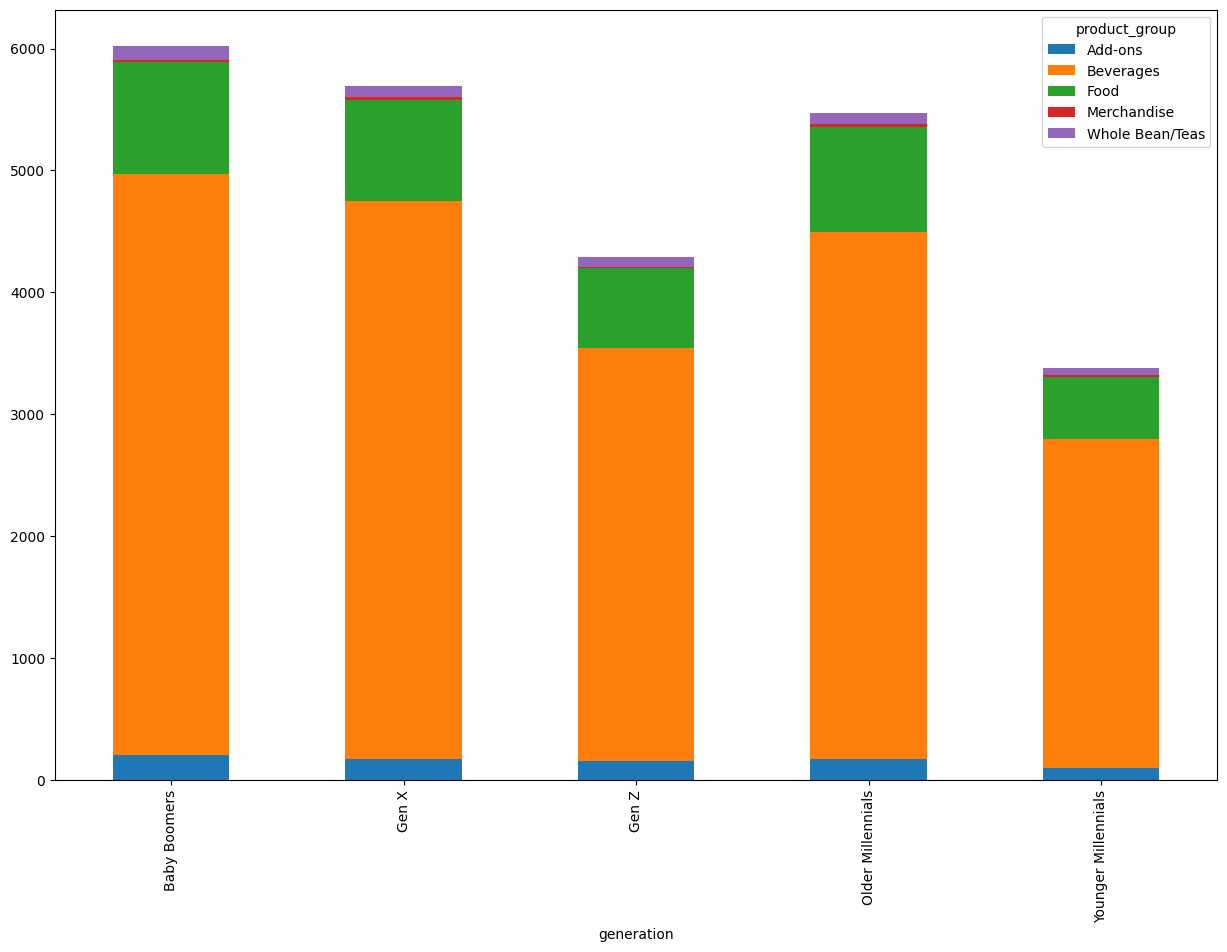

In [ ]:
product_category = pd.merge(salesreciepts_table, product_table, how='left', on='product_id')
agexproduct = pd.merge(product_category, customergenerations_table, how='left', on='customer_id')
generation_group=pd.crosstab(agexproduct['generation'],agexproduct['product_group'],agexproduct['transaction_id'],aggfunc='count')
generation_group.plot(kind = 'bar',figsize = (15,10), stacked = True)

It can be seen that the product groups that are popular in each generation are relatively the same, so it can be concluded that there is no significant influence from generation to product selection

In [ ]:
# 3.2 What is the relationship between consumer age/generation and purchase frequency?

correlation analysis between age and total_transaction
                       age  total_transaction
age                1.00000           -0.70691
total_transaction -0.70691            1.00000


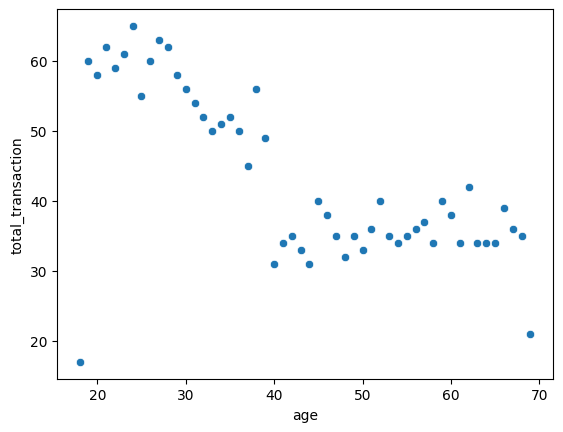

In [ ]:
agextrans = pd.read_sql_query('''
                  SELECT
                      2019 - customer.birth_year AS age,
                      COUNT ('sales reciepts.transaction_id') AS total_transaction
                      FROM customer
                  LEFT JOIN 'sales reciepts' ON 'customer.customer_id' = 'sales reciepts.customer_id'
                  GROUP BY customer.birth_year
                  ORDER BY age
                  ''', conn)
print ('correlation analysis between age and total_transaction')
print(agextrans.corr())
sns.scatterplot(x='age',
                y='total_transaction',
                data = agextrans)
plt.show()

there is a correlation level of -0.7 (medium negative correlation) between age and the number of transactions. This means that there is a tendency that the older the age, the fewer transactions are made. So it can be concluded that customers with a young age make more transactions.

In [ ]:
# 3.3 Is there any correlation between total loyalty cards and transaction frequency?

In [ ]:
print('total customer : ', customer_table ['customer_id'].count())
print('total customer with loyalty card: ', customer_table ['loyalty_card_number'].count())

total customer :  2246
total customer with loyalty card:  2246


each customer that made transaction in the given period had loyalty card, there was no new customer

In [ ]:
# 3.4 Are there differences in the proportion of waste contribution in certain product groups or outlet groups?

% Waste per Product
            count      mean       std   min   25%   50%   75%   max
product_id                                                         
69           63.0  0.516032  0.207003  0.00  0.39  0.56  0.67  0.94
70           61.0  0.542787  0.191669  0.06  0.44  0.56  0.72  0.83
71           61.0  0.527541  0.201929  0.06  0.39  0.56  0.67  0.89
72           62.0  0.762258  0.143726  0.50  0.63  0.79  0.90  0.96
73           60.0  0.555500  0.190525  0.00  0.50  0.56  0.67  0.94


<Axes: xlabel='product_id', ylabel='% waste'>

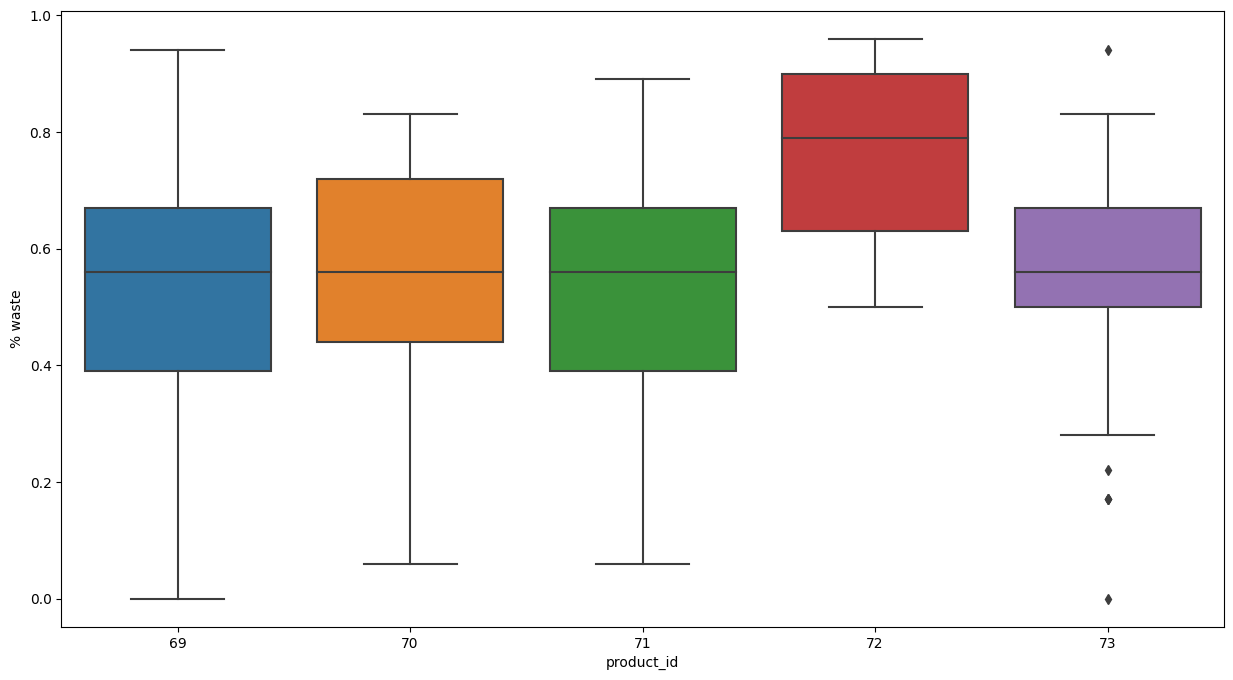

In [ ]:
# % Waste per Product
print ('% Waste per Product')
waste_product = pastryinventory_table.groupby('product_id')['% waste'].describe()
print (waste_product)
plt.figure(figsize=(15,8))
sns.boxplot(x = 'product_id', y = '% waste', data = pastryinventory_table)

product 72 had the highest persentage of daily waste. But overall, waste proportion is extreamely high on each product type

% Waste per Outlet
                 count      mean       std  min   25%   50%   75%   max
sales_outlet_id                                                        
3                 97.0  0.592371  0.215444  0.0  0.44  0.56  0.79  0.94
5                105.0  0.595048  0.193883  0.0  0.50  0.61  0.72  0.94
8                105.0  0.556667  0.216034  0.0  0.44  0.56  0.72  0.96


<Axes: xlabel='sales_outlet_id', ylabel='% waste'>

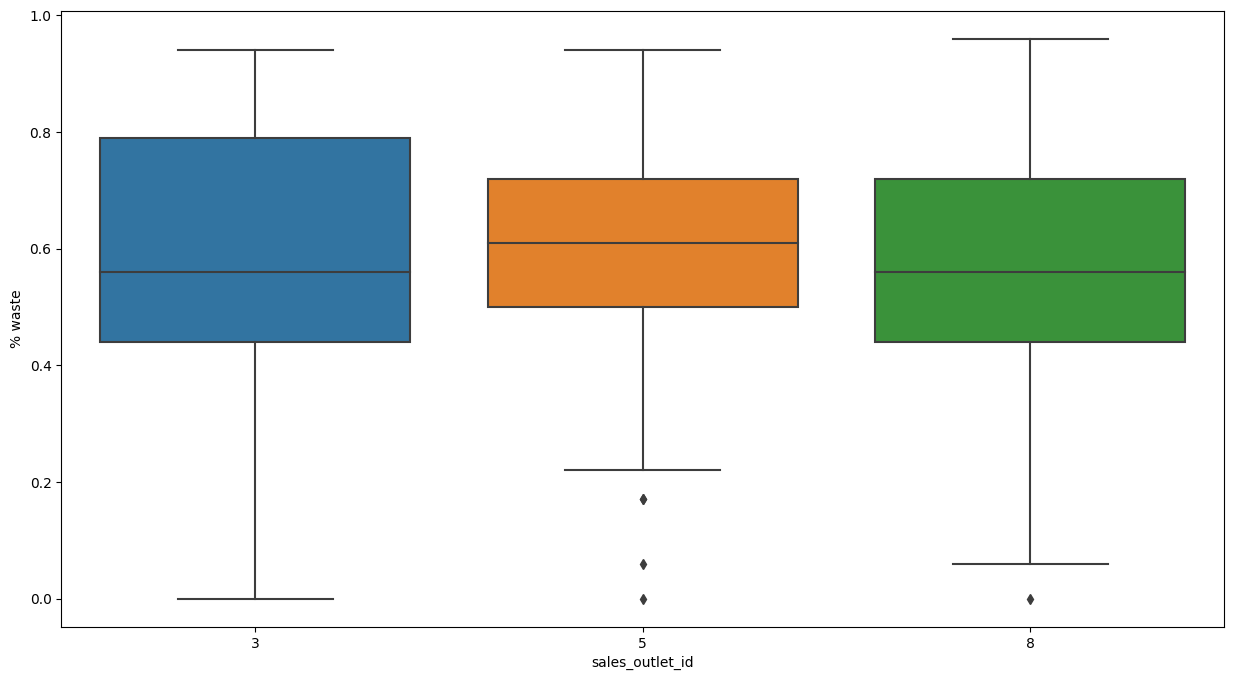

In [ ]:
# % Waste per Outlet
print ('% Waste per Outlet')
waste_product = pastryinventory_table.groupby('sales_outlet_id')['% waste'].describe()
print (waste_product)
plt.figure(figsize=(15,8))
sns.boxplot(x = 'sales_outlet_id', y = '% waste', data = pastryinventory_table)

each outlet contribute relatively same proportion of waste

In [ ]:
#Export Excel Table
salesoutlet_table.to_excel(path + "salesoutlet.xlsx")
pastryinventory_table.to_excel(path + "pastryinventory.xlsx")
product_table.to_excel(path + "product.xlsx")
salesreciepts_table.to_excel(path + "salesreciepts.xlsx")
customergenerations_table.to_excel(path + "customergeneration.xlsx")